In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plot in serif font
plt.rcParams["font.family"] = "serif"
plt.style.use('dark_background')

import pandas as pd

from astropy import coordinates
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import astropy.units as u

from astropy.cosmology import LambdaCDM, z_at_value
from astropy.table import Table, vstack, join, join_skycoord
cosmo = LambdaCDM(H0=69.7, Om0=0.284, Ode0=0.702)

# import functions for formatting data, including custom colormap from cmastro for the green BGS section
from useful_functions import *

In [2]:
# read in files
lss_path = '/global/cfs/cdirs/desi/public/dr1/survey/catalogs/dr1/LSS/iron/LSScats/v1.5/'
LRGz_initial = Table.read(lss_path + 'LRG_full.dat.fits')
BGSz_initial = Table.read(lss_path + 'BGS_BRIGHT_full.dat.fits')
ELGz_initial = Table.read(lss_path + 'ELG_LOPnotqso_full.dat.fits')
QSOz_initial = Table.read(lss_path + 'QSO_full.dat.fits')
len(LRGz_initial), len(BGSz_initial), len(ELGz_initial), len(QSOz_initial)

(3578954, 6650823, 11380673, 2332034)

In [3]:
# prepping files

catalog_initials = [BGSz_initial, LRGz_initial, ELGz_initial, QSOz_initial]
catalogs = []
for cti in catalog_initials:
    #catalogs.append(prep_catalog(cti, ra_min=175, ra_max = 275, dec_min=-7, dec_max=7, z_max=.2))  # good rectangle showing structure
    #catalogs.append(prep_catalog(cti, ra_min=90, ra_max = 280, dec_min=-7, dec_max=7, z_max=.2))    # full NGC slice
    catalogs.append(prep_catalog(cti, ra_min=-0, ra_max = 360, dec_min=-5, dec_max=5, z_max=6))    # full butterfly
    
    #catalogs.append(prep_catalog(cti, ra_min=170, ra_max = 190, dec_min=-5, dec_max=5, z_max=6))    # test butterfly
    
catalogs[2] = catalogs[2][(catalogs[2]['Z']>0.5)] # ELG

## For large butterfly, +/- 10 deg

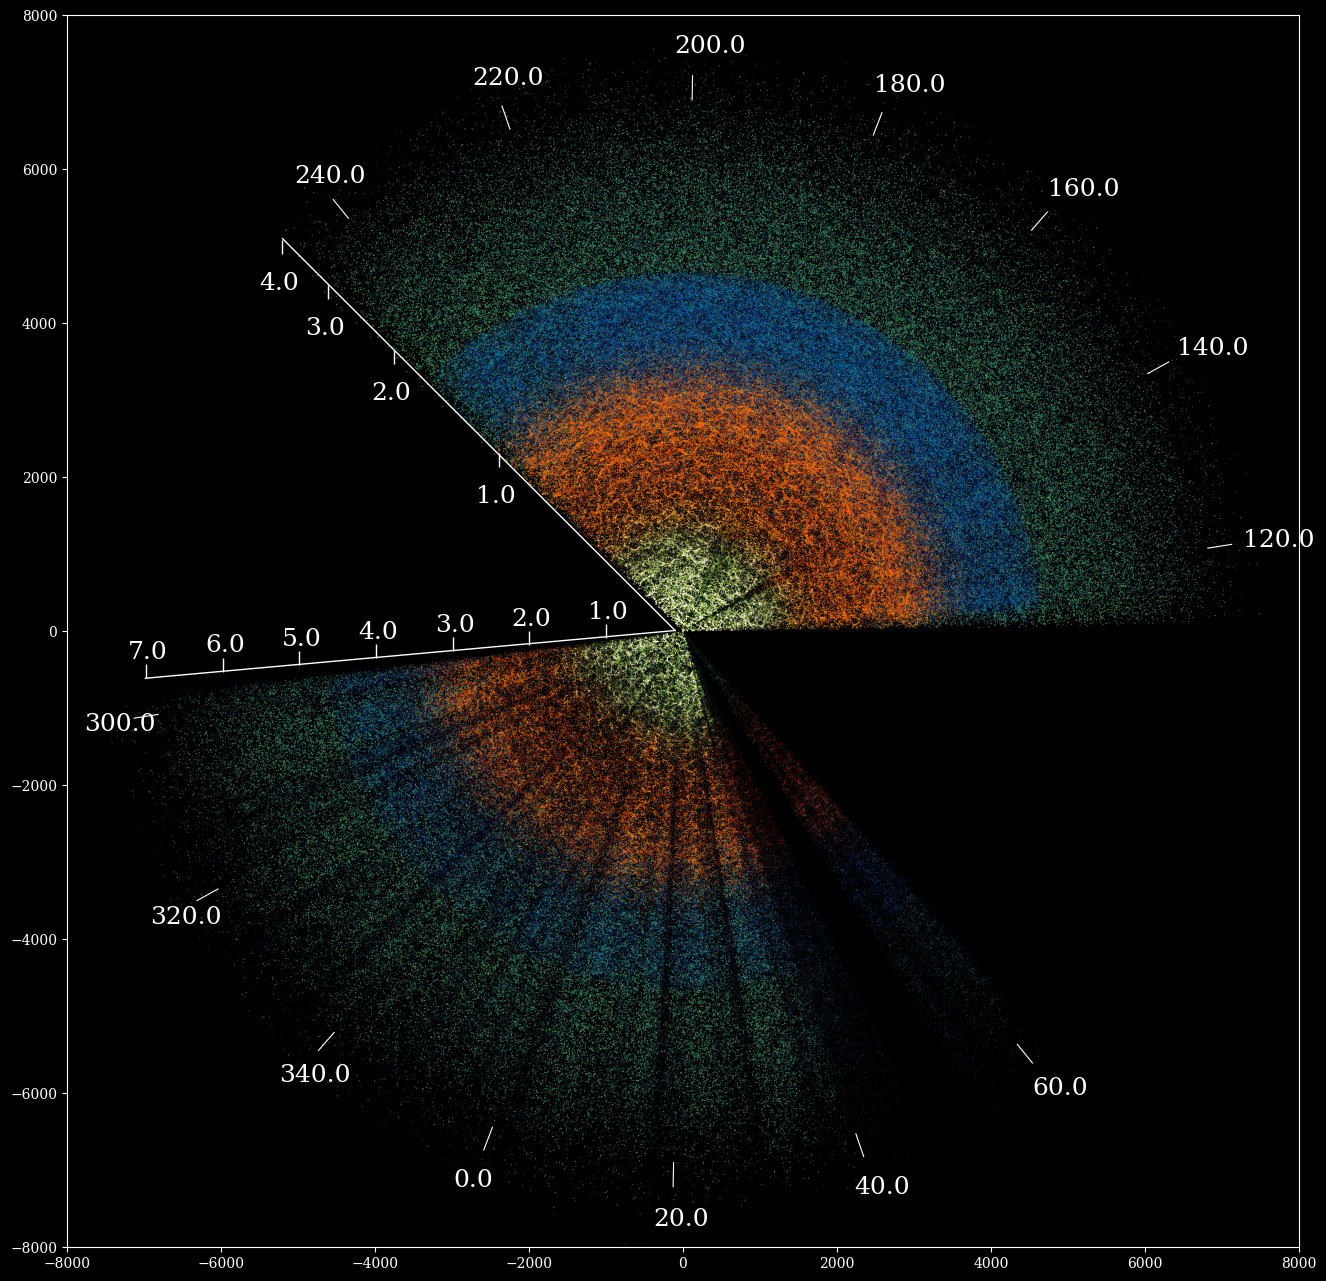

In [4]:
fig = plt.figure(figsize=(18,16))

zorders = [3, 2, 1, 0] # to control which catalog is on top
colormaps = [cmaps['cma:lacerta'], 'autumn', 'winter', 'gist_earth']  # matching DESI official tracer colors
sizes = [.04, .16, .08, .7]
vmins = [-5, -5, -5, -5]
vmaxes = [5, 15, 15, 18]

# PLOTTING DATA

for ci in range(len(catalogs)):
    # scale transparency by depth in third comoving dimension
    alphas = (catalogs[ci]['DEC'] - np.min(catalogs[ci]['DEC']))
    alphas = (alphas / np.max(alphas))**2
    
    plt.scatter(-catalogs[ci]['y_comoving'], catalogs[ci]['x_comoving'], s=sizes[ci], edgecolor='none', zorder=zorders[ci],  
                c=catalogs[ci]['DEC'], cmap=colormaps[ci], alpha=alphas, vmin = vmins[ci], vmax=vmaxes[ci])



# FOR LABELS

# plot markers
markers = [1000, 2000, 3000, 5000, 4000, 6000, 7000]
end_x = -6980
end_y = -610
# plot line from orgin to end
plt.plot([-100, end_x], [10, end_y], color='w', linewidth=1)
# plot as ticks along the line with text labels
for m in markers:
    x = m * end_x / np.sqrt(end_x**2 + end_y**2)
    y = m * end_y / np.sqrt(end_x**2 + end_y**2) + 90
    plt.plot([x], [y], marker='|', color='w', markersize=10) 
    plt.text(x-230, y+160, str(m/1000), fontsize=18, color='w')
    
redshift_markers = [1.0, 2.0, 3.0, 4.0]
end_x = -5200; end_y = 5100
plt.plot([-100, end_x], [10, end_y], color='w', linewidth=1)
# plot as ticks along the line with text labels
for r in redshift_markers:
    comoving_dist = cosmo.comoving_distance(r)
    x = comoving_dist.value * end_x / np.sqrt(end_x**2 + end_y**2)
    y = comoving_dist.value * end_y / np.sqrt(end_x**2 + end_y**2) - 115
    plt.plot([x], [y], marker='|', color='w', markersize=10)
    plt.text(x-300, y-550, str(r), fontsize=18, color='w')

# make extra tick at z = 0.2
comoving_dist = cosmo.comoving_distance(0.2)
x = comoving_dist.value * end_x / np.sqrt(end_x**2 + end_y**2)
y = comoving_dist.value * end_y / np.sqrt(end_x**2 + end_y**2) - 115

# add labels for right ascension
ra_test_points = Table()
ra_test_points['RA'] = np.asarray([120, 140, 160, 180, 200, 220, 240, 60, 40, 20, 0, 340, 320, 300])*u.deg
ra_test_points['DEC'] = 0 * u.deg
ra_test_points['Z'] = 4.5
ra_test_points = get_comoving_coords(ra_test_points)

tick_points1 = ra_test_points.copy()
tick_points1.keep_columns(['RA', 'DEC'])
tick_points1['Z'] = 3.9
tick_points1 = get_comoving_coords(tick_points1)
tick_points2 = ra_test_points.copy()
tick_points2.keep_columns(['RA', 'DEC'])
tick_points2['Z'] = 3.5
tick_points2 = get_comoving_coords(tick_points2)

for i in range(len(ra_test_points)):
    plt.text(-ra_test_points['y_comoving'][i]-250, ra_test_points['x_comoving'][i]-100, str(ra_test_points['RA'][i]), fontsize=18, color='w')
    plt.plot([-tick_points1['y_comoving'][i], -tick_points2['y_comoving'][i]], [tick_points1['x_comoving'][i], tick_points2['x_comoving'][i]], color='w', linewidth=.8, zorder=0)
   

plt.xlim(-8000, 8000); plt.ylim(-8000, 8000)    
# make axis equal
plt.gca().set_aspect('equal', adjustable='box');
#plt.savefig('figures/DESI_DR1_butterfly.jpg', dpi=1000, bbox_inches='tight')#, transparent=True)

## For BGS section

In [5]:
catalog_initials = [BGSz_initial, LRGz_initial, ELGz_initial, QSOz_initial]
catalogs = []
for cti in catalog_initials:
    catalogs.append(prep_catalog(cti, ra_min=90, ra_max = 280, dec_min=-5, dec_max=5, z_max=.2))    # BGS section

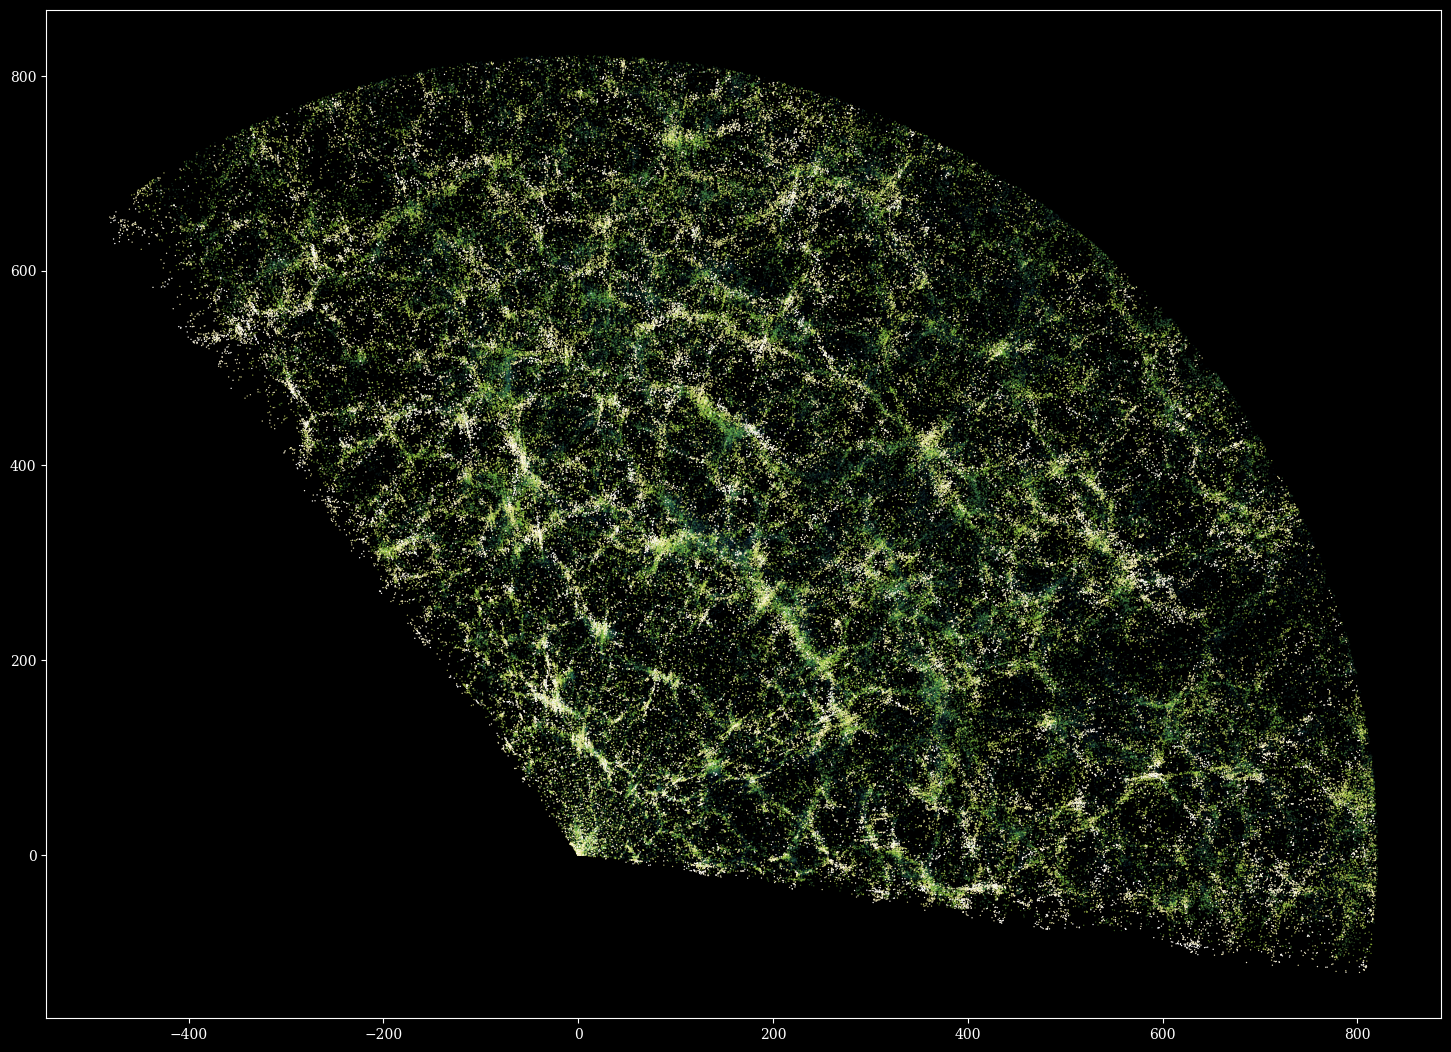

In [6]:
fig = plt.figure(figsize=(18,16))

zorders = [1, 1, 1, 0] # to control which catalog is on top

for ci in range(len(catalogs)):
    
    # scale transparency by depth in third comoving dimension
    alphas = (catalogs[ci]['DEC'] - np.min(catalogs[ci]['DEC']))
    alphas = (alphas / np.max(alphas))**2
    
    plt.scatter(-catalogs[ci]['y_comoving'], catalogs[ci]['x_comoving'], s=1, edgecolor='none', zorder=zorders[ci],  
                c=catalogs[ci]['DEC'], cmap=cmaps['cma:lacerta'], alpha=alphas)
# make axis equal
plt.gca().set_aspect('equal', adjustable='box');
#plt.savefig('figures/DESI_DR1_BGS_slice.jpg', dpi=1000, bbox_inches='tight', transparent=True)
